In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Training'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/Training/glioma_tumor/gg (429).jpg
/content/drive/MyDrive/Training/glioma_tumor/gg (162).jpg
/content/drive/MyDrive/Training/glioma_tumor/gg (376).jpg
/content/drive/MyDrive/Training/glioma_tumor/gg (479).jpg
/content/drive/MyDrive/Training/glioma_tumor/gg (362).jpg
/content/drive/MyDrive/Training/glioma_tumor/gg (256).jpg
/content/drive/MyDrive/Training/glioma_tumor/gg (400).jpg
/content/drive/MyDrive/Training/glioma_tumor/gg (340).jpg
/content/drive/MyDrive/Training/glioma_tumor/gg (196).jpg
/content/drive/MyDrive/Training/glioma_tumor/gg (333).jpg
/content/drive/MyDrive/Training/glioma_tumor/gg (377).jpg
/content/drive/MyDrive/Training/glioma_tumor/gg (19).jpg
/content/drive/MyDrive/Training/glioma_tumor/gg (234).jpg
/content/drive/MyDrive/Training/glioma_tumor/gg (302).jpg
/content/drive/MyDrive/Training/glioma_tumor/gg (576).jpg
/content/drive/MyDrive/Training/glioma_tumor/gg (30).jpg
/content/drive/MyDrive/Training/glioma_tumor/gg (3).jpg
/content/drive/MyD

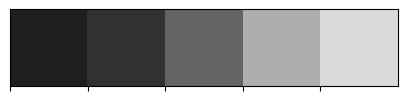

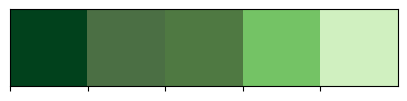

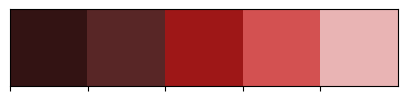

In [ ]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

sns.palplot(colors_dark)
sns.palplot(colors_green)
sns.palplot(colors_red)

In [ ]:
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']

In [ ]:
X_train = []
y_train = []
image_size = 150
for i in labels:
    folderPath = os.path.join('//content/drive/MyDrive/Testing',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)

for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/Testing',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)

X_train = np.array(X_train)
y_train = np.array(y_train)

100%|██████████| 87/87 [00:01<00:00, 63.82it/s]


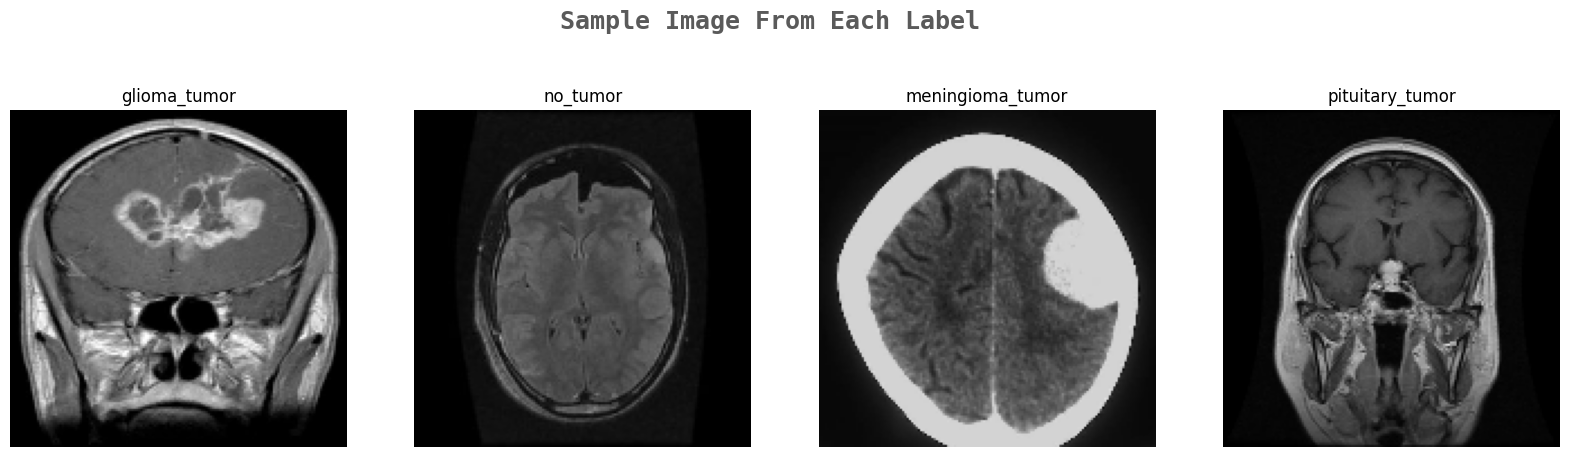

In [ ]:
k=0
fig, ax = plt.subplots(1,4,figsize=(20,20))
fig.text(s='Sample Image From Each Label',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.62,x=0.4,alpha=0.8)
for i in labels:
    j=0
    while True :
        if y_train[j]==i:
            ax[k].imshow(X_train[j])
            ax[k].set_title(y_train[j])
            ax[k].axis('off')
            k+=1
            break
        j+=1

In [ ]:
X_train, y_train = shuffle(X_train,y_train, random_state=101)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.1,random_state=101)

In [ ]:
y_train[1]

'no_tumor'

In [ ]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
effnet = EfficientNetB0(weights='imagenet',include_top=Fa
                        lse,input_shape=(image_size,image_size,3))

In [ ]:
model = effnet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(4,activation='softmax')(model)
model = tf.keras.models.Model(inputs=effnet.input, outputs = model)

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_2 (Rescaling)        (None, 150, 150, 3)  0           ['input_2[0][0]']                
                                                                                                  
 normalization_1 (Normalization  (None, 150, 150, 3)  7          ['rescaling_2[0][0]']            
 )                                                                                                
                                                                                            

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= ['accuracy'])

In [ ]:
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("effnet.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)

In [ ]:
history = model.fit(X_train ,y_train,validation_split=0.1, epochs =10, verbose=1, batch_size=32)

Epoch 1/10
21/21 [==============================] - 132s 5s/step - loss: 0.6845 - accuracy: 0.7416 - val_loss: 0.6575 - val_accuracy: 0.7297
Epoch 2/10
21/21 [==============================] - 100s 5s/step - loss: 0.1349 - accuracy: 0.9529 - val_loss: 0.7430 - val_accuracy: 0.8108
Epoch 3/10
21/21 [==============================] - 101s 5s/step - loss: 0.1370 - accuracy: 0.9620 - val_loss: 0.4926 - val_accuracy: 0.8243
Epoch 4/10
21/21 [==============================] - 101s 5s/step - loss: 0.0756 - accuracy: 0.9742 - val_loss: 0.6186 - val_accuracy: 0.8784
Epoch 5/10
21/21 [==============================] - 104s 5s/step - loss: 0.0585 - accuracy: 0.9757 - val_loss: 0.4492 - val_accuracy: 0.9054
Epoch 6/10
21/21 [==============================] - 101s 5s/step - loss: 0.0848 - accuracy: 0.9711 - val_loss: 0.6629 - val_accuracy: 0.9189
Epoch 7/10
21/21 [==============================] - 100s 5s/step - loss: 0.0713 - accuracy: 0.9818 - val_loss: 0.3932 - val_accuracy: 0.9595
Epoch 8/10
21

In [ ]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

3/3 [==============================] - 5s 710ms/step


In [ ]:
print(classification_report(y_test_new,pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91        25
           1       1.00      0.93      0.96        27
           2       0.94      0.88      0.91        17
           3       1.00      1.00      1.00        13

    accuracy                           0.94        82
   macro avg       0.95      0.94      0.94        82
weighted avg       0.94      0.94      0.94        82



In [ ]:
def img_pred(upload):
    for name, file_info in uploader.value.items():
        img = Image.open(io.BytesIO(file_info['content']))
    opencvImage = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    img = cv2.resize(opencvImage,(150,150))
    img = img.reshape(1,150,150,3)
    p = model.predict(img)
    p = np.argmax(p,axis=1)[0]

    if p==0:
        p='Glioma Tumor'
    elif p==1:
        print('The model predicts that there is no tumor')
    elif p==2:
        p='Meningioma Tumor'
    else:
        p='Pituitary Tumor'

    if p!=1:
        print(f'The Model predicts that it is a {p}')

Text(0.5, 1.0, 'Model Accuracy')

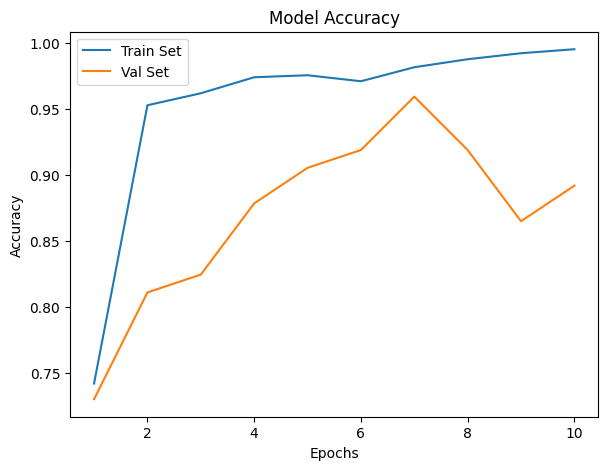

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

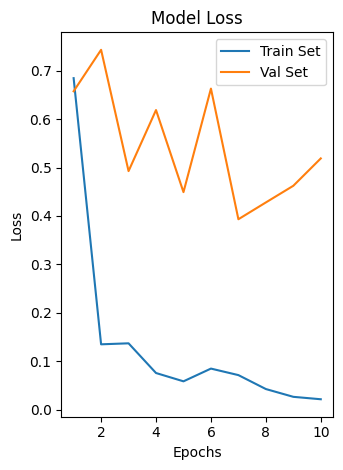

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

In [ ]:
uploader = widgets.FileUpload()
display(uploader)

FileUpload(value={}, description='Upload')

In [ ]:
button = widgets.Button(description='Predict')
out = widgets.Output()
def on_button_clicked(_):
    with out:
        clear_output()
        try:
            img_pred(uploader)

        except:
            print('No Image Uploaded/Invalid Image File')
button.on_click(on_button_clicked)
widgets.VBox([button,out])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
